<a href="https://colab.research.google.com/github/HeberthDCM/A-ViT/blob/master/NNR_Temperatura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import tensorflow as tf
import numpy as np

In [58]:
celscius = np.array([-40,-10,0,8,15,22,38], dtype=float)
farenheit = np.array([-40,14,32,46,59,72,100], dtype = float)

In [59]:
#capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#modelo = tf.keras.Sequential([capa])

In [60]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss = 'mean_squared_error'
)

Entrenamiento

In [62]:
print("Comenzamos entrenamiento...")
historial = modelo.fit(celscius, farenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzamos entrenamiento...
Modelo entrenado!


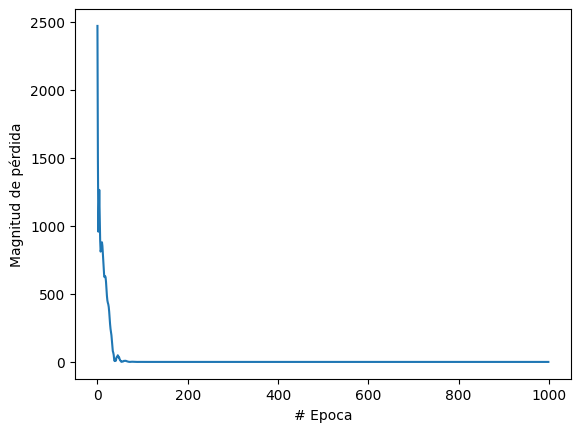

In [63]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])


In [64]:
print("Hagamos una predicción!")
resultado = modelo.predict(np.array([100.0]).reshape(1,1))
print("El resultado es " + str(resultado) + " farenheit!")

Hagamos una predicción!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
El resultado es [[211.74736]] farenheit!


In [65]:
print("Variables internas del modelo")
#print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[1.1175236 , 0.28864247, 0.24897566]], dtype=float32), array([ 4.016799 , -1.7631667, -2.6462338], dtype=float32)]
[array([[-0.0430553 , -1.1008524 ,  0.49082938],
       [-0.08728046,  0.41280764, -0.69206935],
       [-0.72646147,  0.34034038, -0.12754072]], dtype=float32), array([ 3.486331 , -3.9343588,  4.0614343], dtype=float32)]
[array([[ 0.9806293 ],
       [-1.7940378 ],
       [ 0.64957726]], dtype=float32), array([3.8235073], dtype=float32)]
